In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [57]:
dirs = [d for d in os.listdir() if os.path.isdir(d)]
dirs

['old_percent_075_lw07_DP',
 'old_percent_075_lw09_DP',
 'old_percent_075_lw03_DP',
 'old_percent_075_lw05_DP',
 'old_percent_075_lw0001_DP',
 'old_percent_075_lw001_DP',
 'old_percent_075_lw01_DP',
 'old_percent_075_lw0005_DP']

In [58]:
# load all .csv files in dirs as dataframes and concatenate them
dfs = []
for d in dirs:
    seeds = [f for f in os.listdir(os.path.join('./',d)) if f.startswith('seed')]
    for seed in seeds:
        results = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('test_results')][0]
        results_df = pd.read_csv(os.path.join(d, seed, results))
        dfs.append(results_df)
df = pd.concat(dfs)


In [59]:
df = df[["test/lungOpacity_young_subgroupAUROC","test/lungOpacity_old_subgroupAUROC","job_type_mod"]]
# extract number at the end of job_type_mod
df['job_type_mod'] = df.job_type_mod.str.extract('(\d+)')
# insert '.' after first character in job_type_mod
df['job_type_mod'] = df.job_type_mod.str[:1] + '.' + df.job_type_mod.str[1:]
# cast job_type_mod to float
df['job_type_mod'] = df['job_type_mod'].astype(float)
df.head()

,test/lungOpacity_young_subgroupAUROC,test/lungOpacity_old_subgroupAUROC,job_type_mod
0,0.6112,0.8052,0.700
0,0.6112,0.8052,0.900
0,0.6112,0.8052,0.300
0,0.6116,0.8054,0.500
0,0.6098,0.6916,0.001


In [60]:
# melt columns to rows
df = pd.melt(df.reset_index(), id_vars=['job_type_mod'], value_vars=['test/lungOpacity_young_subgroupAUROC','test/lungOpacity_old_subgroupAUROC'])
df

,job_type_mod,variable,value
0,0.700,test/lungOpacity_young_subgroupAUROC,0.6112
1,0.900,test/lungOpacity_young_subgroupAUROC,0.6112
2,0.300,test/lungOpacity_young_subgroupAUROC,0.6112
3,0.500,test/lungOpacity_young_subgroupAUROC,0.6116
4,0.001,test/lungOpacity_young_subgroupAUROC,0.6098
5,0.010,test/lungOpacity_young_subgroupAUROC,0.6244
6,0.010,test/lungOpacity_young_subgroupAUROC,0.6176
7,0.100,test/lungOpacity_young_subgroupAUROC,0.6112
8,0.005,test/lungOpacity_young_subgroupAUROC,0.6200
9,0.700,test/lungOpacity_old_subgroupAUROC,0.8052


In [61]:
df.variable = df.variable.str.replace('test/lungOpacity_young_subgroupAUROC','young')
df.variable = df.variable.str.replace('test/lungOpacity_old_subgroupAUROC','old')

[Text(0, 0.5, 'subgroup AUROC')]

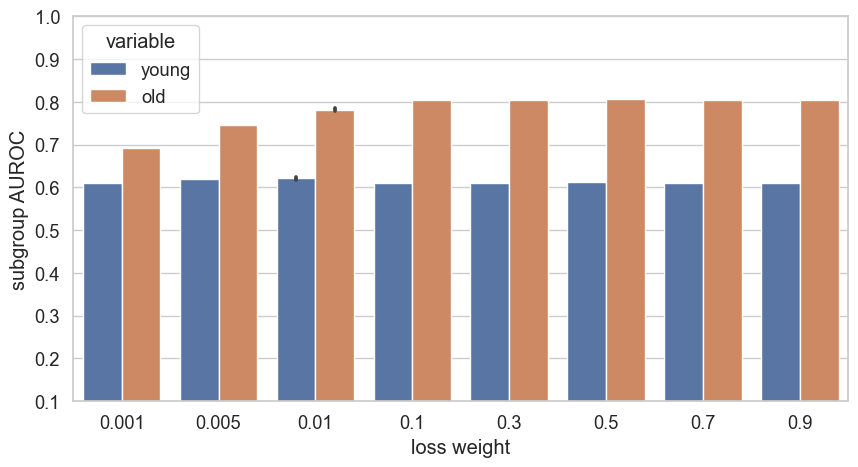

In [62]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.2, style="whitegrid")
g = sns.barplot(x='job_type_mod', y='value', hue='variable', data=df)
# set y axis limit
g.set(ylim=(0.1, 1))
g.set(xlabel='loss weight')
g.set(ylabel='subgroup AUROC')
# put legend outside of plot
# plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)